
## Chapter 4 [Spectroscopy](CH4_00-Spectroscopy.ipynb)


<hr style="height:1px;border-top:4px solid #FF8200" />

# Introduction to X-Rays 

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM/main/Spectroscopy/CH4_12-Introduction_X_Rays.ipynb)
 

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main//Spectroscopy/CH4_12-Introduction_X_Rays.ipynb)

part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>


**Spring 2024**
<table style="margin-right:auto;margin-left:0px">
  <tr>
    <td>Gerd Duscher </td>
    <td>Khalid Hattar</td>
  </tr>
  <tr>
    <td>Microscopy Facilities</td> 
    <td> Tennessee Ion Beam Materials Laboratory </td>
  </tr>
  
  <tr>
    <td>Materials Science & Engineering</td>
    <td> Nuclear Engineering</td>
  </tr>
  <tr>
    <td>Institute of Advanced Materials & Manufacturing</td>
    <td> </td>
  </tr>
  <tr>
    <td colspan="2"><center> The University of Tennessee, Knoxville</center> </td>
  </tr>
</table>

Background and methods to analysis and quantification of data acquired with transmission electron microscopes.


## Load relevant python packages
### Check Installed Packages

In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.2.3':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q

print('done')

installing pyTEMlib
done


### Load the plotting and figure packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,
* three dimensional plotting
and some libraries from the book
* kinematic scattering library.

In [9]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
if 'google.colab' in sys.modules:
    from google.colab import output
    from google.colab import drive
    output.enable_custom_widget_manager()
    
__notebook__ = 'CH4_12-Introduction_X_Rays'
__notebook_version__ = '2023_01_22'


## Inelastic Scattering:

When a high energy electron collides with matter there are several process going on:

![inelastic_scattering](./images/inelastic.jpg)


In an TEM and SEM there are quite a few inelastic signals available:
- Secondary electrons
- X-Rays
- Auger electrons
- Light (photons in visible range)

## X-Rays
Here we consider only X-Rays and Auger Electrons as those originate from competing processes:
![X-Ray_Auger](./images/X-Ray_Auger.jpg)

The excited atom has two possibilities to return to the ground state:

We consider the energy before and after the relaxation process.
### X-Ray branch 
The emitted photon has the energy of the energy gained in the relaxtion process. In the carbon atom case above, an electron from the 2p states relaxes to the *1s* state: from the L$_3$ to the K shell.

The energy difference of a  photon is the $E_K$ - $E_L$, which is well in the X-ray range.

*Please note that the transition from 2s to 1s is dipole forbidden and cannot occur.*

### Auger  branch 
The emitted electron leaves behind an atom with a closed K shell ($-E_K$) and looses two 2p electrons ($+2 E_L$. This energy will be transfered to the Auger electron as kinetic energy $ E_{kin} = E_K-2E_L$

In [10]:
## 
E_K = 284 # in eV
E_L = 7   # in eV

print(f'X-ray photon has the energy {E_K-E_L} eV')
print(f'Auger electron has the kinetic energy {E_K-2* E_L} eV')

X-ray photon has the energy 277 eV
Auger electron has the kinetic energy 270 eV


## Fluorescent Yield

The Auger and X-ray branches are not equally probable. In the carbon atom characteristic X-ray emission occurs at about 26% of the K-shell ionization. 

The fraction that of the ionization that *yields* photons is called **fluorescent yield** $\omega$. 

The fluorescent yield is strongly dependent on the atomic number [E.A. Preoteasa et al. 2012 – ISBN 978-1-61470-208-5]:

![fluorescentYield](./images/fluorescenceYield3.png)

The fluorescent yield follows approximatively an equation  of the form:

$$ \omega = \frac{Z^4}{\alpha+Z^4} $$
with 
- $Z$: atomic number
- $\alpha$: constant about 10$^6$ for K lines

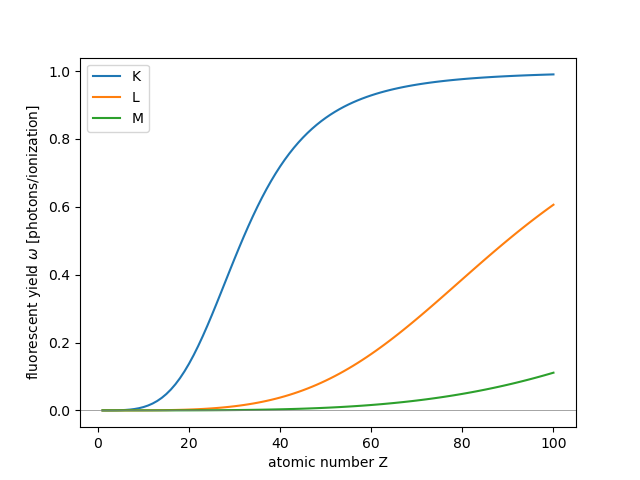

In [11]:
Z =  np.linspace(1,100,100)

alpha_K = 1e6
alpha_L = 6.5e7
alpha_M = 8*1e8#2.2e10
omega_K = Z**4/(alpha_K+Z**4)
omega_L = Z**4/(alpha_L+Z**4)
omega_M = Z**4/(alpha_M+Z**4)

plt.figure()
plt.plot(Z,omega_K, label='K')
plt.plot(Z,omega_L, label='L')
plt.plot(Z,omega_M, label='M')
plt.legend()
plt.xlabel('atomic number Z')
plt.ylabel('fluorescent yield $\omega$ [photons/ionization]')
plt.axhline(y=0., color='gray', linewidth=0.5);

## uncomment lines below for log scale 
# plt.gca().set_yscale('log')
# plt.ylim(1e-4, 0.9)

## Comparison

The data and formula agree quite well given the simplicty of the model.



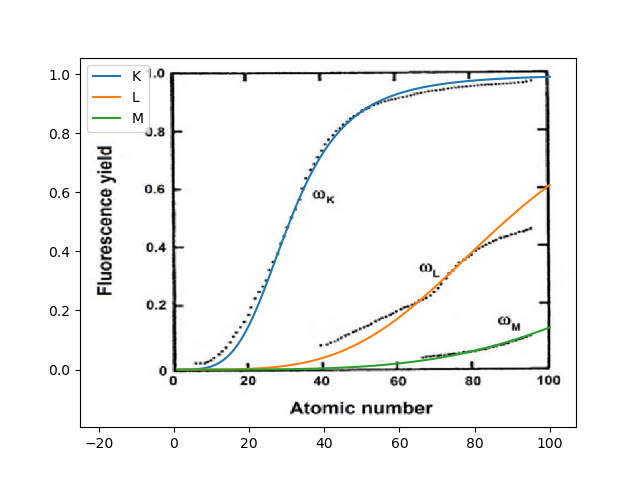

In [12]:
fname = './images/fluorescenceYield3.png'
im = plt.imread(fname)
Z =  np.linspace(1,100,100)

alpha_K = .9e6
alpha_L = 6.e7
alpha_M = 6*1e8#2.2e10
omega_K = Z**4/(alpha_K+Z**4)
omega_L = Z**4/(alpha_L+Z**4)
omega_M = Z**4/(alpha_M+Z**4)


plt.figure()

plt.imshow(im, cmap = 'gray', extent = (-25, 107,-.195,1.056))
plt.plot(Z,omega_K, label='K')
plt.plot(Z,omega_L, label='L')
plt.plot(Z,omega_M, label='M')
plt.legend()

plt.gca().set_aspect('auto')
#plt.axhline(y=0., color='gray', linewidth=0.5);
#plt.axhline(y=1., color='gray', linewidth=0.5);
#plt.axvline(x=0., color='gray', linewidth=0.5);
#plt.axvline(x=100., color='gray', linewidth=0.5);


In [6]:
8**4/(alpha_K+8**4)

0.0045304923370969455

## Energy Dispersive Spectrum


An energy dispersive X-ray spectrum (EDS)contains two different parts:
- [Characteristic X-ray peaks](./CH4_14-Characteristic_X_Rays.ipynb)
- [Bremsstrahlung](./CH4_13-Bremsstrahlung.ipynb)
    
![Spectrum](./images/Spectrum.png)    


The Bremsstrahlung causes the background the characteristic X-ray peaks are sitting on.

## Navigation

- <font size = "3">  **Next: [Bremsstrahlung](CH4_13-Bremsstrahlung.ipynb)** </font>
- <font size = "3">  **Chapter 4: [Spectroscopy](CH4_00-Spectroscopy.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>
